Definition

Probability is a way of quantifying the uncertainty associated with events chosen from some universe of events. 

Notionally P(E) means the probability of event E. 

Two events E and F are dependent if knowing something about whether E happens gives us information about whether F happens- and vice versa. Otherwise, they are independent. 

Mathematically, we say two events E and F are independent if the probability that they both happen is the product of the probabilities that each one happens: 

P(E,F) = P(E)P(F)

Conditional Probability
When two events E and F are independent, then as before, we have: 

P(E,F) = P(E)P(F)

If they're not necessarily independent and the probability of F is not zero, then we define the probability of E conditional on F as: 

P(E|F) = P(E,F) / P(F)

Should think of this as the probability that E happens given that we already know that F happens. 

In [27]:
import random
import math
import collections
from matplotlib import pyplot as plt

In [5]:
def random_kid():
    return random.choice(["boy","girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl": 
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older =="girl" or younger == "girl":
        either_girl += 1
        
print("P(both | older):", both_girls / older_girl)       # ~ 1/2
print("P(both | either):", both_girls / either_girl)     # ~ 1/3

P(both | older): 0.49886036468330136
P(both | either): 0.3327687383302214


# Bayes Theorem

Bayes theorem is a way of reversing conditional probabilities. 

Say we need to know the probability of some event E conditional on some other event F occurring. But we only have information about the probability of F conditional on E occurring. Using the definition of conditional probability twice tells us that: 


    P(E|F) = P(E,F) / (PF)
           = P(F|E)P(E) / P(F)
 
 
The event F can be split into two mutually exclusive events "F and E" and "F and not E". If we write ¬E for "not E" (i.e. E doesn't happen), then: 

    P(F) = P(F,E) + P(F, ¬E)

So that: 

    P(E|F) = P(F|E_P(E) / [P(F|E)P(E) + P(F|¬E)(P¬E)]
    
  Which is often how Bayes's Theorem is stated. 
  
  


Random Variable

A random variable is a variable whose possible values have an associated probility disribution. A very simple random variable equals 1 if a coin flip turns up heads and 0 if the flip turns up tails. A more complicated one might measure the number of heads observed when flipping a coin 10 times, or a value picked from range(10), where each number is equally likely. 

The associated distribution gives the probabilities that the variable realises each of its possible values. The coin flip variable equals 0 with probability 0.5 and 1 with probability 0.5. The range(1) variable has a distribution that assigns probability 0.1 to each number from 0 to 9. 

We will sometimes talk about the expected value of a random variable. this is the average of its values weighted by their probabilities. The coin flip variable has an expected value of (0*1/2 + 1/1/2 = ) 1/2. The range(10) variable has an expected value of (0*0.1 + 1/0.1 + 2/0.1 + 3/0.1... + 9/0.1  = 45/0.1) = 4.5

Random variables can be conditioned on events just as other events can be. going back to the child example, if X is the random variable representing the number of girls, X = 0 with probability 0.25, 1 with probability 0.5 and 2 with probability 0.25. 


# Continuous distribution

A coin flip corresponds to a discrete distribution- one that associates positive probability with discrete outcomes. Often, we'll want to model distributions across a continuum of outcomes. For example, the uniform distribution puts equal weight on all the numbers between 0 and 1. Because there are infinitely many numbers between 0 and 1, this means the weight it assigns to individual points must be zero. For this reason, we represent a continuous density with a probability density function, such that the probability of seeing a value in a certain range, eqiuals the integral of the density function over the interval. 

In [1]:
# Density functiion for the uniform distribution is just: 

def uniform_pdf(x):
    return 1 if x >=0 and x < 1 else 0

# Cumulative distribution function
# Gives the probability that a random variable is less than or equal to a certain value. 
# For the Uniform Distribution: 

def uniform_cdf(x):
    """returns the probability that a uniform random variable is <= x """
    
    if x < 0:
        return 0    # Can't be less than 0. 
    elif x < 1: 
        return x    # e.g. P(x <= 0.4) = 0.4
    else:
        return 1    # uniform random variable is always less than 1. 
    
    

## Normal Distribution

The normal distribution is the classic bell-shaped curve. It is completely determined by two parameters: 
its mean ($\mu$) and
its standard deviation ($\sigma$)

The mean indicates where the bell curve is centred and the standard deviation is how wide the curve is. 

It has the probability density function: 

$$f( x | \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})$$


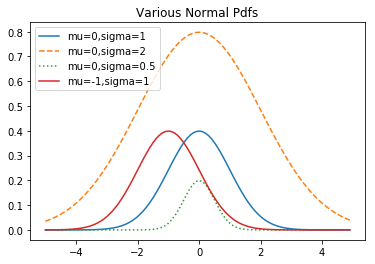

In [8]:
# python implementation: 

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2/ 2 / sigma ** 2) / sqrt_two_pi * sigma)

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label="mu=0,sigma=1")
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label="mu=0,sigma=2")
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label="mu=0,sigma=0.5")
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-', label="mu=-1,sigma=1")
plt.legend()
plt.title("Various Normal Pdfs")
plt.show()


When $\mu$ = 0 and $\sigma$ =1, its called the standard normal distribution. If Z is a standard normal distribution variable, then it turns out that: 
$$X = \sigma Z + \mu$$ 

is also normal, but with mean $\mu$ and standard deviation $\sigma$. Conversely, if X is a normal random variab;le with mean $\mu$ and standard deviation $\sigma$: 

$$Z = (X - \mu) / \sigma$$

is also a standard normal variable. 

The cumulative distribution function for the normal distribution cannot be written in an elementary manner, but, can cheat and use python's math.erf function: 


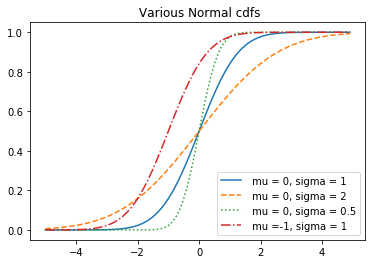

In [10]:
def normal_cdf(x, mu=0, sigma=1):
        return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2
    

xs = [x / 10.0 for x in range(-50, 50)] 
plt.plot( xs,[ normal_cdf( x, sigma = 1) for x in xs],'-', label =' mu = 0, sigma = 1') 
plt.plot( xs,[ normal_cdf( x, sigma = 2) for x in xs],'--', label =' mu = 0, sigma = 2') 
plt.plot( xs,[ normal_cdf( x, sigma = 0.5) for x in xs],':', label =' mu = 0, sigma = 0.5') 
plt.plot( xs,[ normal_cdf( x, mu =-1) for x in xs],'-.', label =' mu =-1, sigma = 1') 
plt.legend( loc = 4) # bottom right 
plt.title(" Various Normal cdfs") 
plt.show()



Sometimes, there is a requirement to inverse the CDF, to work out the value of a specified probability. There's no simple way to compute the inverse, but normal_cdf is continuous and strictly increasing, so binary search will work: 


In [18]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """Calculate the x value from a normal distribution given a probability p"""
    
    # if not standard, compute standard and rescale... 
    if mu != 0 or sigma != 1: 
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0                   #normal_cdf(-10) is (very close to) 0
    high_z = 10.0                   #normal_cdf( 10) is (very close to) 1
    
    while high_z - low_z > tolerance:
        mid_z = (low_z + high_z) / 2             # find the midpoint. 
        mid_p = normal_cdf(mid_z)                # work out the probability for that value
        
        if mid_p < p:
            # midpoint too low, search above it. 
            low_z = mid_z
        elif mid_p > p: 
            # midpoint too high, search below it. 
            high_z = mid_z
        else:
            break
            
    return mid_z

In [19]:
inverse_normal_cdf(0.5)

0.0

## Central Limits Theorem

One reason the normal distribution is so useful is the central limits theorem, which says )in essence) that a random variable defined as the average of a large number of independent and identially distributed random variables is itself approximately normally distributed. 

In particular, if ${x_1}, \dotsc, {x_n}$ are random variables with mean $\mu$ and standard deviation $\sigma$, and if $n$ is large, then: 

$$ \frac{1}{n} ({x_1} + \dots + {x_n}) $$

is approximately normally distributed with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$. 

This is more usefully written as: 

$$ \frac{({x_1} + \dots + {x_n}) - \sigma n}{\sigma\sqrt{n}} $$, with mean 0 and standard deviation 1. 

An easy way to illustrate this is by looking at binomial random variables, which have two parameters, n and p. A Binomial (n,p) random variable is simply the sum of n independent Bernoulli(p) random variables, each of which equals 1 with probability $p$ and 0 with probability $1-p$.

In [23]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

#binomial(10,0.2)

2

The mean of a Bernoulli(p) variable is p and its standard deviation is $\sqrt{[(1-p)}$. The central limits theorem says that as nb gets large, a Binomial(n,p) variable is approximately a normal variable with mean $\mu = np$ and standard deviation $\sigma = \sqrt{np(1 - p}$. 

If we plot both, you can see the resemblance... 

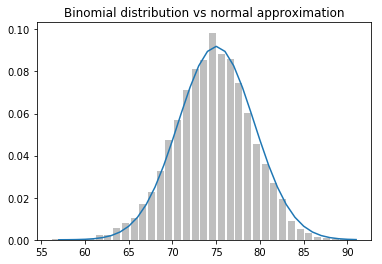

In [28]:
def make_hist(p,n,num_points):
    
    data = [binomial(n,p) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples... 
    histogram = collections.Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()], 
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1-p))
    
    # use a line chart to show the normal approximation.. 
    xs = range(min(data), max(data)+1)
    ys = [normal_cdf(i+0.5, mu, sigma)- normal_cdf(i - 0.5, mu, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial distribution vs normal approximation")
    plt.show()
    

make_hist(0.75,100,10000)
    

The moral of this approximation is that if you want to know (say) the probability that a fair coin turns up more than 60 heads in 100 flips, you can estimate it as the probability that a Normal(50,5) is greater than 60, which is easier than computing the Binomial(100,0.5) cdf. 
In most applications, however, the statistical software you use will gladly calculate this for you! 

